
# **Módulo** | Python: Projeto Final
Caderno de **Aula**<br>
[Diogo Ramos](https://www.linkedin.com/in/diogobarbosaramos/)


- Neste projeto de Previsão de Análise de Concessão de Cartão de Crédito utilizando Python, foi abordado o problema de concessão de cartões de crédito com base em dados históricos. O objetivo principal foi desenvolver um modelo preditivo para identificar clientes "bons" ou "ruins" em termos de inadimplência.
- Utilizamos técnicas de Estatística para entender a distribuição dos dados e explorar relações entre variáveis com o Pandas. Além disso, aplicamos técnicas de Visualização de Dados usando bibliotecas como matplotlib e seaborn para visualizar gráficos e distribuições.
- A preparação dos dados incluiu limpeza e transformação usando Python.
- Em seguida, construímos modelos de Machine Learning, especificamente Random Forest, para prever a inadimplência.
- Avaliamos a eficácia do modelo com base na acurácia e criamos uma matriz de confusão para entender os resultados.
- No futuro, a implementação desse modelo pode ser usada em uma estratégia de concessão de cartões de crédito, ajudando a automatizar decisões e reduzir riscos.


---

# **Tópicos**

<ol type="1">
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling.</li>
</ol>


---

# **Etapas**

## 1\. Exploração de Dados

**Vamos** explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Importação das bibliotecas utilizadas (Pandas, Seaborn e Pyplot do Matplotlib)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Vamos começar lendos os dados num dataframe `pandas`.

In [2]:
# utilização do método read_csv para ler o arquivo .csv pelo link da internet
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values = 'na')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [4]:
df.head(2)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33


Com o dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.


### **1.1. Estrutura**

In [5]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

In [6]:
# estrutura dos dados de clientes que não apresentaram default (default = 0)
df[df['default'] == 0].shape

(8500, 16)

In [7]:
# estrutura dos dados de clientes que apresentaram default (default = 1)
df[df['default'] == 1].shape

(1627, 16)

In [8]:
qtde_total,_ = df.shape
qtde_adimplentes,_ = df[df['default'] == 0].shape
qtde_inadimplentes,_ = df[df['default'] == 1].shape

In [9]:
print(f'A proporção de clientes adimplentes é de {round(100 * qtde_adimplentes / qtde_total,2)}%')
print(f'A proporção de clientes inadimplentes é de {round(100 * qtde_inadimplentes / qtde_total,2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


### **1.2. Schema**

In [10]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28



 - Colunas e seus respectivos tipos de dados.

In [11]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [12]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [13]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **1.3. Dados faltantes**

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [14]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos verificar quais colunas possuem dados faltantes.

In [15]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [16]:
# função que calcula a estatístuca de cada coluna com dado faltante

def stats_dados_faltantes(df: pd.DataFrame) -> None:
    for col in df.columns:
        if df[col].isna().any():
            qtd = df[col].isna().sum()
            total = df.shape[0]
            dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentage': round(100 * qtd / total, 2)}}
            print(dict_dados_faltantes)

In [17]:
# função para imprimir a estatistica de dados faltantes para clientes default e não default

def stats_por_default(df: pd.DataFrame):
    df_default = df[df['default'] == 1]

    df_nao_default = df[df['default'] == 0]

    print("Dados faltantes para clientes default:")
    stats_dados_faltantes(df_default)

    print("\nDados faltantes para clientes não default:")
    stats_dados_faltantes(df_nao_default)


stats_por_default(df)



Dados faltantes para clientes default:
{'escolaridade': {'quantidade': 256, 'porcentage': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentage': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentage': 11.49}}

Dados faltantes para clientes não default:
{'escolaridade': {'quantidade': 1263, 'porcentage': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentage': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentage': 10.88}}


## 2\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **2.1. Correção de schema**

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [18]:
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [19]:
df[['limite_credito','valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [20]:
fn = lambda valor: float(valor.replace(',','.').replace('.',''))

valores_teste = ['12.691,51','8.256,96','3.418,56']
valores_teste_limpos = list(map(fn, valores_teste))

print(valores_teste)
print(valores_teste_limpos)

['12.691,51', '8.256,96', '3.418,56']
[1269151.0, 825696.0, 341856.0]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [21]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [22]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [23]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [24]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
limite_credito,10127.0,863244.016491,908878.804086,143800.0,255535.5,454942.0,1106817.5,3451699.0
valor_transacoes_12m,10127.0,440458.304730,339712.807764,51016.0,215582.5,389959.0,474131.0,1848493.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.2. Remoção de dados faltantes**


Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.



In [25]:
# remover os dados faltantes
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [26]:
# formato do data set após a remoção dos dados faltantes
df.shape

(7081, 16)

In [27]:
qtde_total_depois,_ = df.shape
qtde_total_inadimplente_depois,_ = df[df['default'] == 1].shape
qtde_total_adimplente_depois,_ = df[df['default'] == 0].shape

In [28]:
print(f'A proporção de clientes adimplentes do data set original é de {round(100 * qtde_adimplentes / qtde_total,2)}%')
print(f'A proporção de clientes adimplentes do data set após a remoção dos dados faltantes é de {round(100 * qtde_total_adimplente_depois / qtde_total_depois,2)}%')
print(f'A proporção de clientes inadimplentes do data set original é de {round(100 * qtde_inadimplentes / qtde_total,2)}%')
print(f'A proporção de clientes inadimplentes do data set após a remoção dos dados faltantes é de {round(100 * qtde_total_inadimplente_depois / qtde_total_depois,2)}%')



A proporção de clientes adimplentes do data set original é de 83.93%
A proporção de clientes adimplentes do data set após a remoção dos dados faltantes é de 84.28%
A proporção de clientes inadimplentes do data set original é de 16.07%
A proporção de clientes inadimplentes do data set após a remoção dos dados faltantes é de 15.72%


## 3\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então escolhendo um tema para os gráficos e separando os clientes adimplentes e inadimplentes

In [29]:
# escolha do tema "Whitegrid" do seaborn
sns.set_style("whitegrid")

In [30]:
df_adimplente = df[df['default'] == 0]

In [31]:
df_inadimplente = df[df['default'] == 1]

### **3.1. Visualizações categóricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [32]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


 - Escolaridade

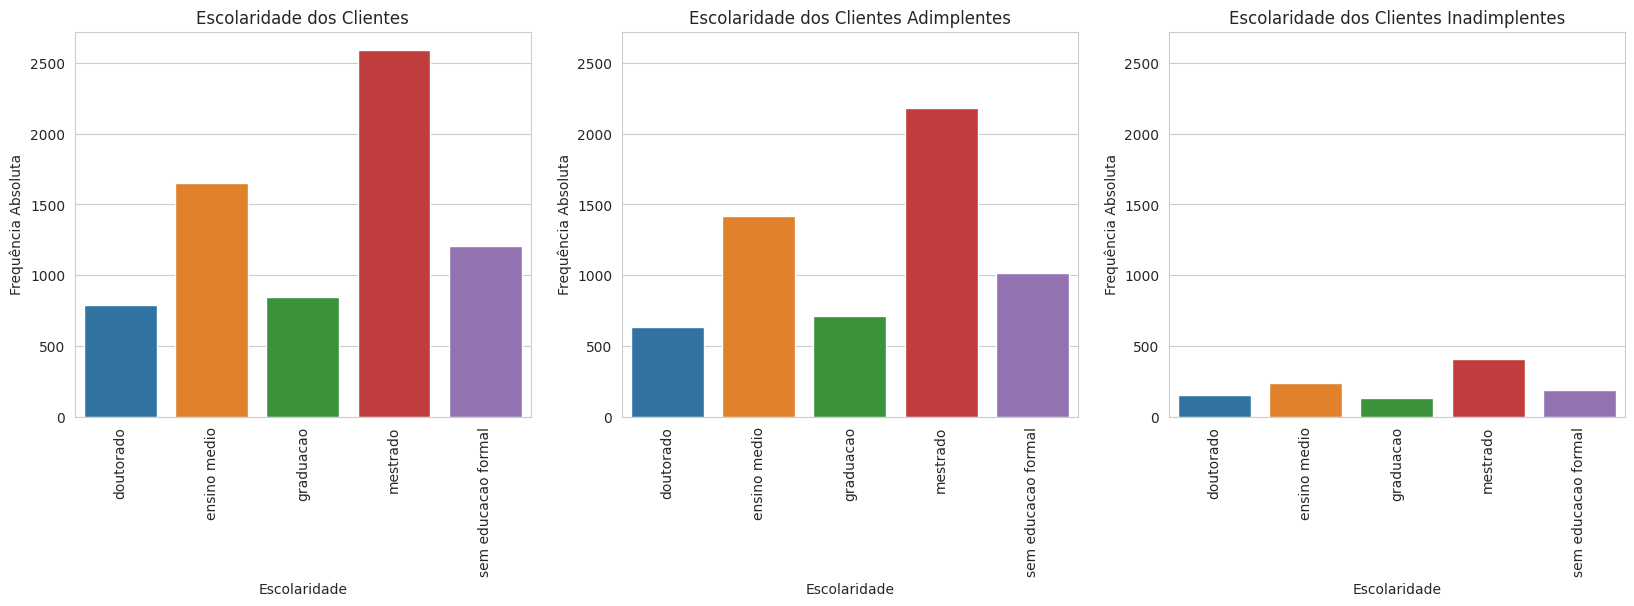

In [33]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Salário Anual

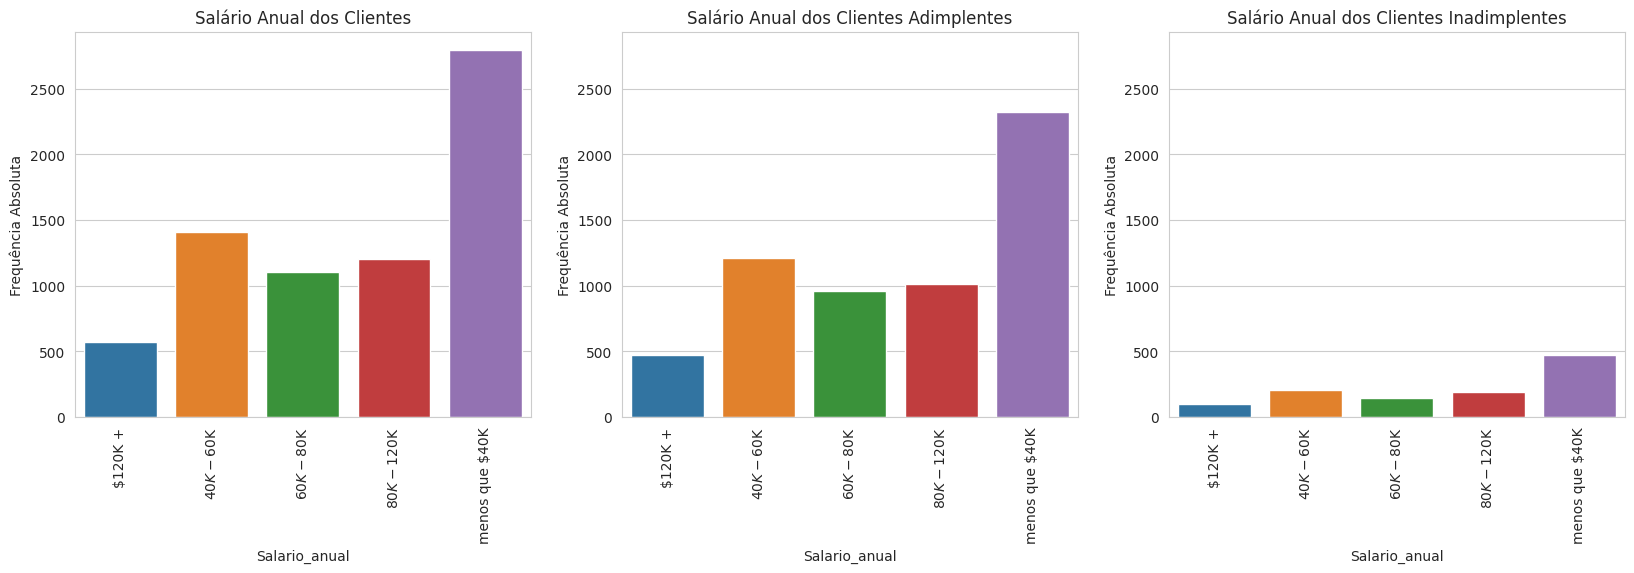

In [34]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

- Estado Civil

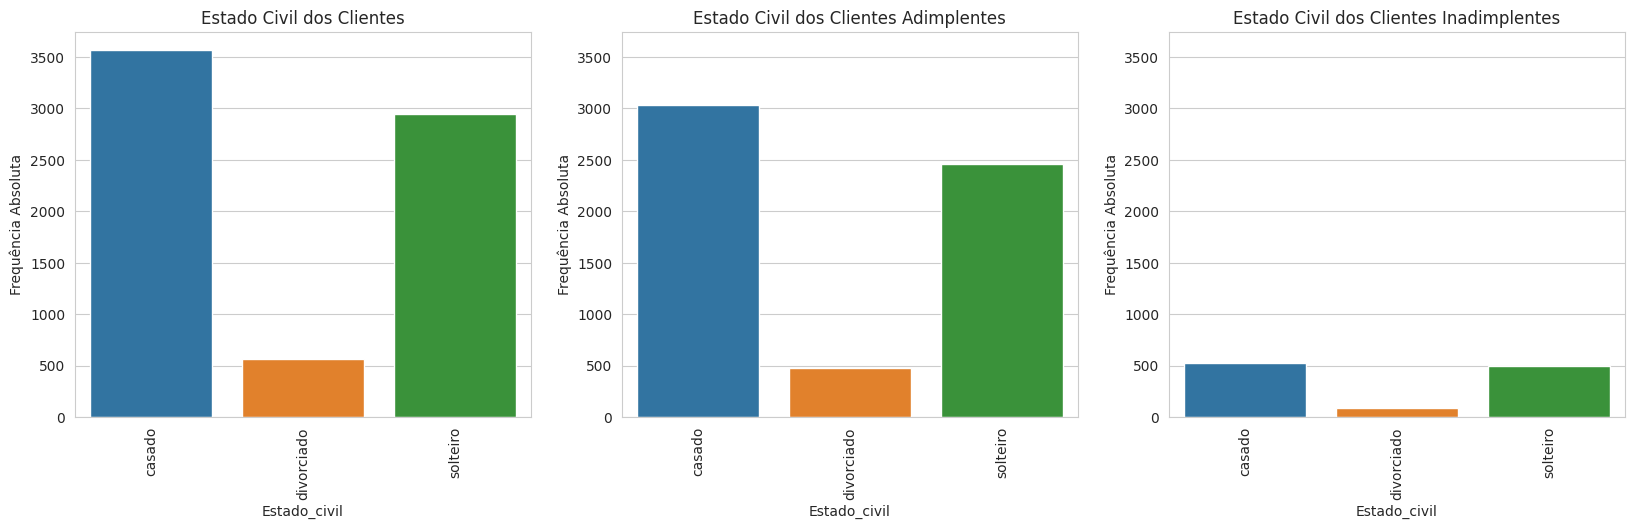

In [35]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

- Tipo de Cartão

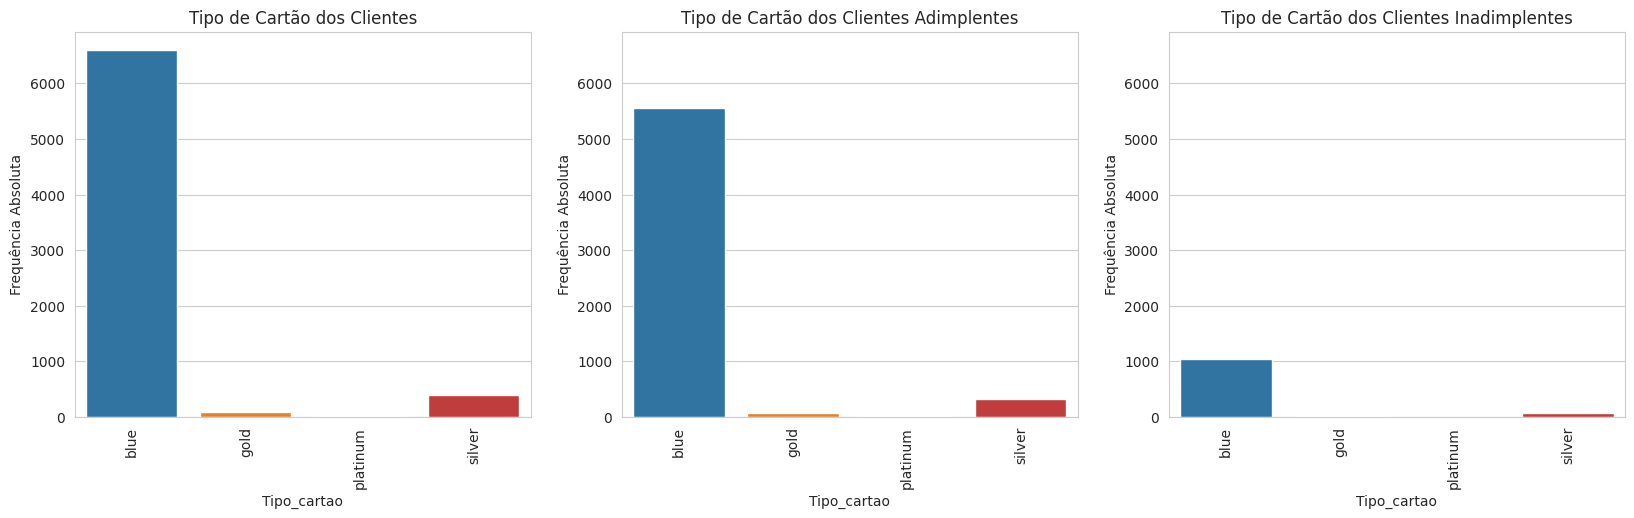

In [36]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

NOTA: A Lei nº 13.709, de 14 de agosto de 2018, ou Lei Geral de Proteção de Dados (LGPD), entrou em vigência em setembro de 2020 e estabelece regras sobre como os dados pessoais (de pessoa física) devem ser tratados nos meios físicos ou digitais. O objetivo da lei é proteger os direitos de liberdade e privacidade dos titulares de dados pessoais, trazendo maior transparência e controle sobre a utilização de seus dados.

As informações mais pessoais passaram a ser consideradas como “dados sensíveis” pela LGPD, aumentando a restrição de seu uso.

> Os dados sensíveis são informações que abrem margem para discriminação do indivíduo e que, portanto, merecem maior nível de proteção e cuidado. São dados que revelam convicção religiosa, opinião política, filiação a sindicato ou organização de caráter religioso, filosófico ou político, origem étnica ou racial, informações referentes à saúde, vida sexual, genética e biometria, quando vinculados a uma pessoa natural.

Deste modo, a coluna **sexo** será desconsiderada das análises.

## Análise das Visualizações Gráficas das Variáveis Categóricas acima:
Pelo padrão observado na base total de clientes, nos clientes adimplentes e clientes inadimplentes, não é possível verificar relação entre as variáveis categóricas e o cliente ter ou não default.

### **3.2. Visualizações numéricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [37]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,1269151.0,114490.0,42
1,49,5,44,6,2,1,825696.0,129145.0,33
2,51,3,36,4,0,1,341856.0,188772.0,20
4,40,3,21,5,0,1,471622.0,81608.0,28
5,44,2,36,3,2,1,401069.0,108807.0,24


- Idade Clientes

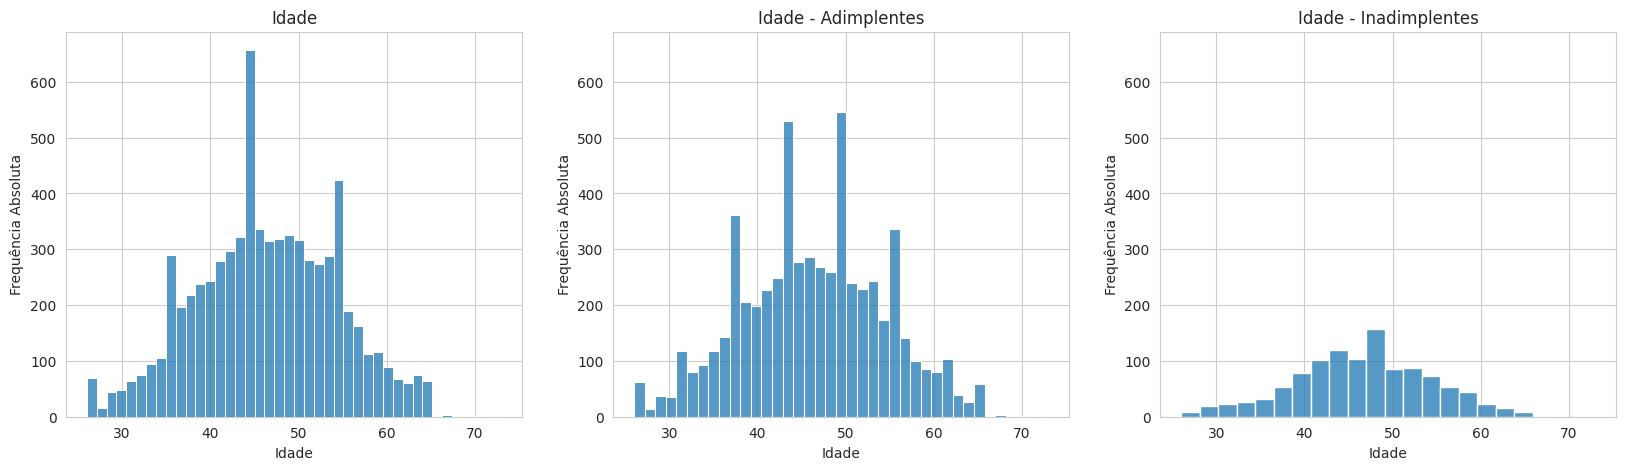

In [38]:
coluna = 'idade'
titulos = ['Idade', 'Idade - Adimplentes', 'Idade - Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Quantidade de Transações nos Últimos 12 Meses

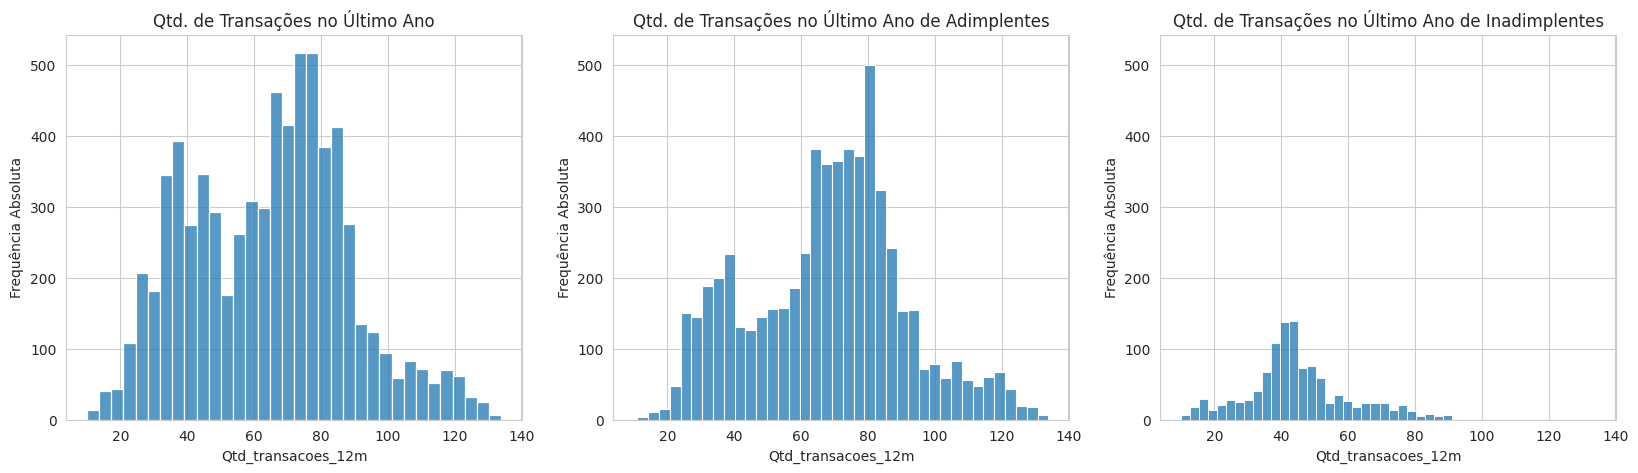

In [39]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor das Transações nos Últimos 12 Meses

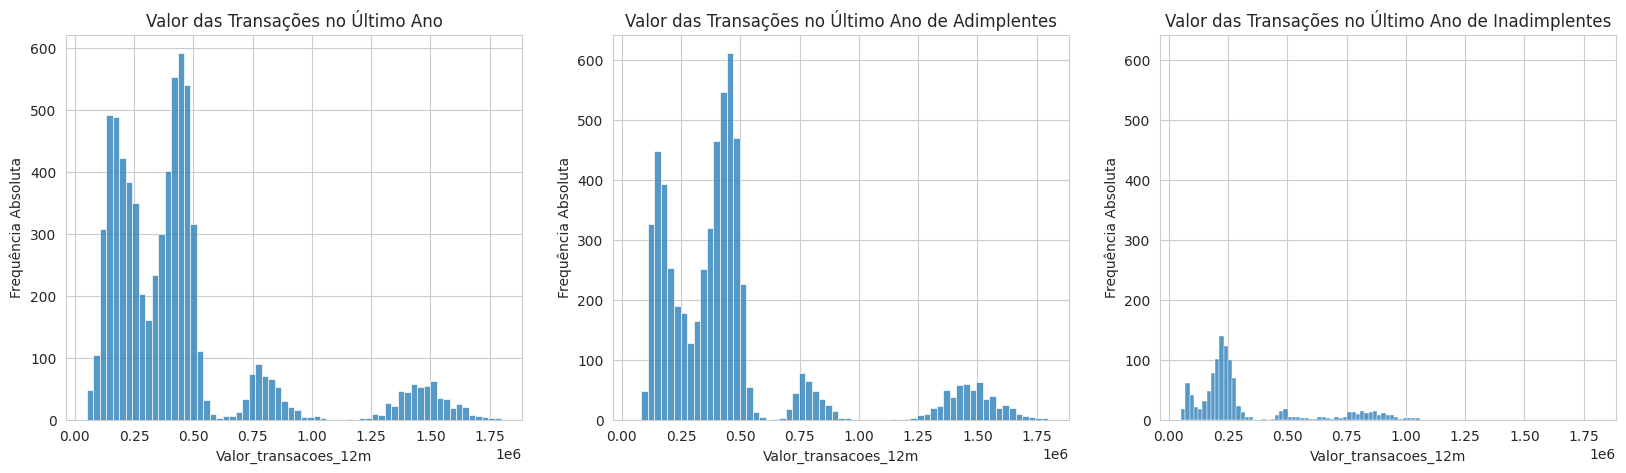

In [40]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

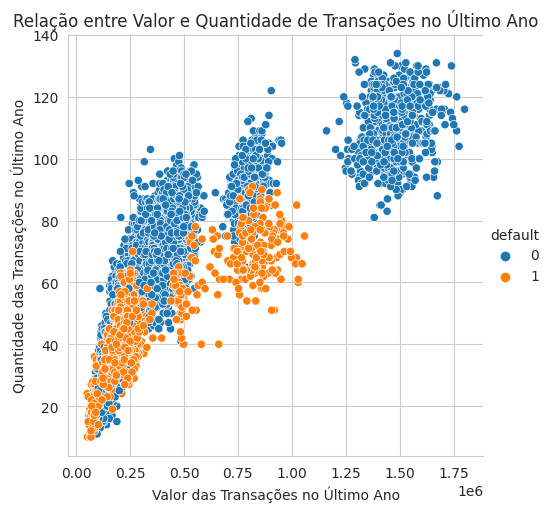

In [41]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

## 4\. Resumo dos Insights gerados

De acordo com as visualizações geradas a partir dos dados disponíveis, verificamos que as **variáveis categóricas** (escolaridade, estado civil, salário anual e tipo de cartão) **não possuem relação com o nível de inadimplência** dos clientes.

Já em algumas **variáveis numéricas conseguimos ver alguma relação com a inadimplência**:

1. Podemos observar que há uma maior concentração de clientes inadimplentes com **idades entre 42 e 52 anos**;
2. A maior parte dos clientes inadimplentes possuem o **pico de 40 transações em 12 meses**;
3. O **valor das transações em 12 meses** de clientes inadimplentes se concentram também **próximo a 2.500,00**;
4. **Clientes que tem muitas transações (acima de 90 transações por ano) e possuem valores mais altos (acima de R$ 12.000,00) não estão dentro dos clientes inadimplentes**.


Dessa forma, a instituição financeira deve concentrar seus esforços nos clientes que possuem essas características para tentar minimizar os impactos de um eventual default ou possibilidade de conceder o crédito e o cliente ficar inadimplente.